# EE399 HW2
## Ziwen


https://github.com/ZiwenLi0325/EE399.git

In [404]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.io import loadmat
results = loadmat('yalefaces.mat')
X=results['X']
print(X.shape)

(1024, 2414)


# (a)

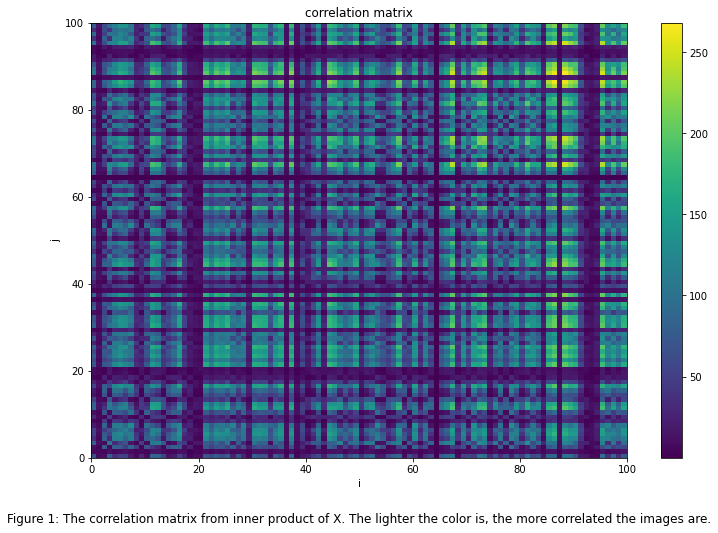

In [405]:
C = np.zeros([100,100])
for i in range(100):
    for j in range(100):
        C[i,j] = np.dot(X[:,i],X[:,j])
plt.pcolor(C)
plt.colorbar()
plt.title("correlation matrix")
plt.xlabel("i")
plt.ylabel("j")
plt.text(0.5, -0.15, 'Figure 1: The correlation matrix from inner product of X. The lighter the color is, the more correlated the images are.', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.gcf().set_size_inches(12, 8)
plt.savefig("figure1.png")

# (b)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The index i,j with the largest entry is (86, 88)


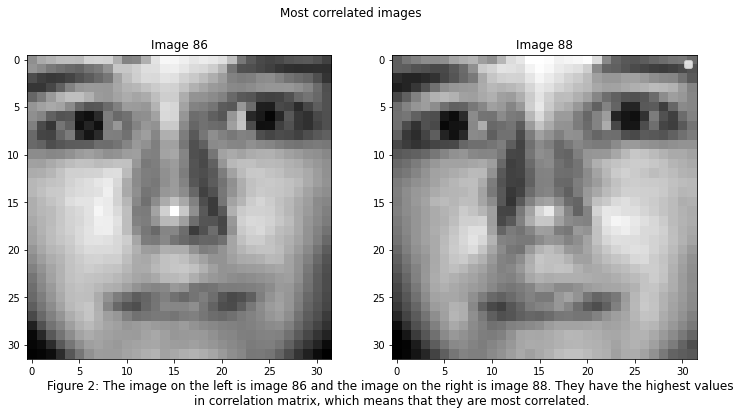

In [406]:
# Create a copy of the correlation matrix C
C_remove = C.copy()

# Find the indices of the largest entry in the correlation matrix
i, j = np.unravel_index(C_remove.argmax(), C_remove.shape)

# Set the diagonal elements of the correlation matrix to zero
np.fill_diagonal(C_remove, 0)

# Find the indices of the largest entry in the modified correlation matrix
i, j = np.unravel_index(C_remove.argmax(), C_remove.shape)

# Print the indices of the most correlated images
print(f"The index i,j with the largest entry is ({i}, {j})")

# Display the two most correlated images side by side
plt.subplot(1,2,1)
print_copy = X[:,86]
plt.title("Image 86")
plt.imshow(print_copy.reshape([32,32]),cmap = "gray")
plt.subplot(1,2,2)
print_copy = X[:,88]
plt.imshow(print_copy.reshape([32,32]),cmap = "gray")
plt.legend()

# Add a descriptive caption to the plot
plt.text(0, -0.15, 'Figure 2: The image on the left is image 86 and the image on the right is image 88. They have the highest values \nin correlation matrix, which means that they are most correlated.', ha='center', fontsize=12, transform=plt.gca().transAxes)

# Set the size of the figure and add titles
plt.gcf().set_size_inches(12, 8)
plt.title("Image 88")
plt.suptitle("Most correlated images",y = 0.85)

# Save the plot to a file
plt.savefig("figure2.png")


In [407]:
# Find the index i,j with the smallest entry
small = 100
for i in range(100):
    for j in range(100):
        if C[i,j] < small and i!=j:
            small = C[i,j] 
            i_index = i
            j_index = j
print(f"The index i,j with the smallest entry is ({i_index}, {j_index})")
print(small)

The index i,j with the smallest entry is (54, 64)
0.002161908881199547


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


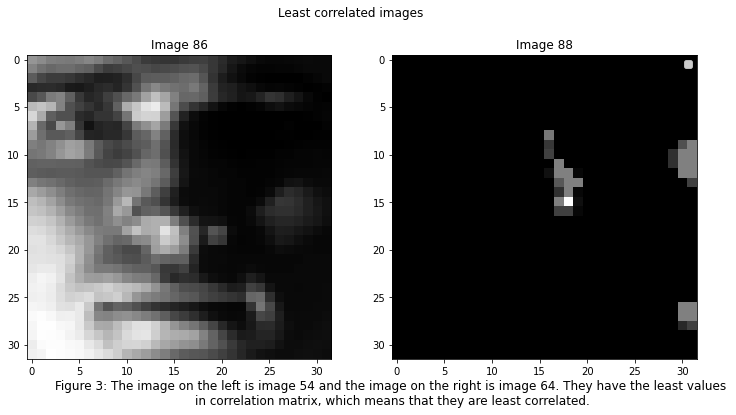

In [408]:
# Display the two least correlated images side by side
plt.subplot(1,2,1)
print_copy = X[:,54]
plt.title("Image 86")
plt.imshow(print_copy.reshape([32,32]),cmap = "gray")
plt.subplot(1,2,2)
print_copy = X[:,64]
plt.imshow(print_copy.reshape([32,32]),cmap = "gray")
plt.legend()

# Add a descriptive caption to the plot
plt.text(0, -0.15, 'Figure 3: The image on the left is image 54 and the image on the right is image 64. They have the least values \nin correlation matrix, which means that they are least correlated.', ha='center', fontsize=12, transform=plt.gca().transAxes)

# Set the size of the figure and add titles
plt.gcf().set_size_inches(12, 8)
plt.title("Image 88")
plt.suptitle("Least correlated images",y = 0.85)

# Save the plot to a file
plt.savefig("figure3.png")


# (C)

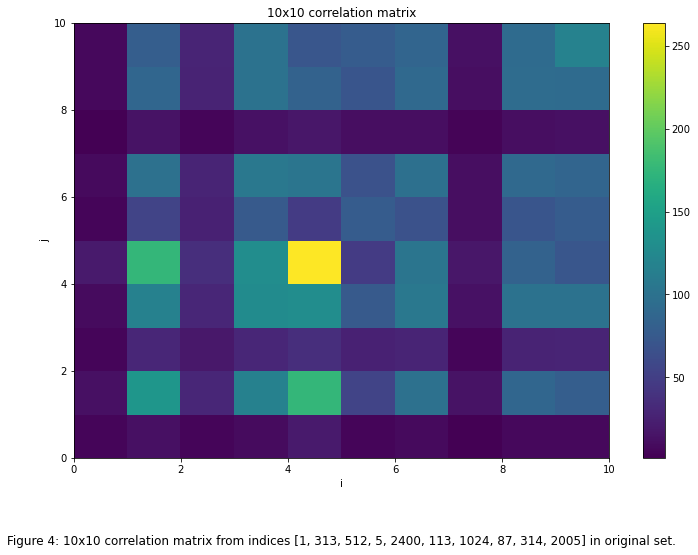

In [409]:
array_index = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005] 
image_set = np.array([X[:,i] for i in array_index])

# Calculate the correlation matrix using dot product
Y = np.matmul(image_set,np.transpose(image_set))

# Plot the correlation matrix as a heatmap
plt.pcolor(Y)
plt.colorbar()
plt.xlabel("i")
plt.ylabel("j")
plt.text(0.5, -0.2, 'Figure 4: 10x10 correlation matrix from indices [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005] in original set.', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.title("10x10 correlation matrix")
plt.gcf().set_size_inches(12, 8)
plt.savefig("figure4.png")


# (d)

In [410]:
Y = np.matmul(X,np.transpose(X))
eigenvalues, eigenvectors = np.linalg.eig(Y)
largest_indices = np.argsort(np.abs(eigenvalues))[::-1][:6]
largest_eigenvectors = eigenvectors[:, largest_indices]
print(eigenvalues[:6])
print(largest_eigenvectors[:6])
print(largest_eigenvectors)

[234020.45485389  49038.31530059   8236.53989701   6024.87145793
   2051.49643269   1901.07911482]
[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 [ 0.0289902   0.04316163  0.02344727  0.05744188  0.00932899  0.05424285]
 [ 0.03057294  0.04080838  0.00992662  0.05720359  0.02096932  0.06259919]
 [ 0.03229324  0.03805116 -0.00241627  0.05372178  0.02766062  0.0694475 ]]
[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941

# (e)

In [411]:
# Perform SVD on X
U, s, Vt = np.linalg.svd(X)
print(s[0:6])
# Extract the first six principal components
PCs = Vt[:6, :].T
# Normalize principal components to have unit length
PCs_norm = np.linalg.norm(PCs, axis=0)
PCs = PCs / PCs_norm
print(U[:6, :])
# Show the first six principal components
for i in range(6):
    pc = PCs[:, i]

[483.75660704 221.44596474  90.75538495  77.62004546  45.29344801
  43.60136597]
[[-0.02384327  0.04535378  0.05653196 ... -0.00238077 -0.0015886
   0.00041024]
 [-0.02576146  0.04567536  0.04709124 ...  0.00265168  0.00886966
  -0.0047811 ]
 [-0.02728448  0.04474528  0.0362807  ... -0.00073077 -0.00706009
   0.00678472]
 [-0.0289902   0.04316163  0.02344727 ... -0.00367797  0.00323748
   0.00077172]
 [-0.03057294  0.04080838  0.00992662 ...  0.00988825 -0.00657576
   0.00607428]
 [-0.03229324  0.03805116 -0.00241627 ... -0.01055232  0.00471235
  -0.00872253]]


# (f)

In [414]:
u_1 = U[:,0]
print(u_1)
v_1 = eigenvectors[:,0]
print(v_1)
l2_norm = np.sqrt(np.sum(np.square(np.abs(u_1)-np.abs(v_1))))
print("The difference of norm between u_1 and v_1 is "+str(l2_norm)+".")

[-0.02384327 -0.02576146 -0.02728448 ... -0.02082937 -0.0193902
 -0.0166019 ]
[0.02384327 0.02576146 0.02728448 ... 0.02082937 0.0193902  0.0166019 ]
The difference of norm between u_1 and v_1 is 6.535857028199339e-16.


# (g)

[483.75660704 221.44596474  90.75538495  77.62004546  45.29344801
  43.60136597]


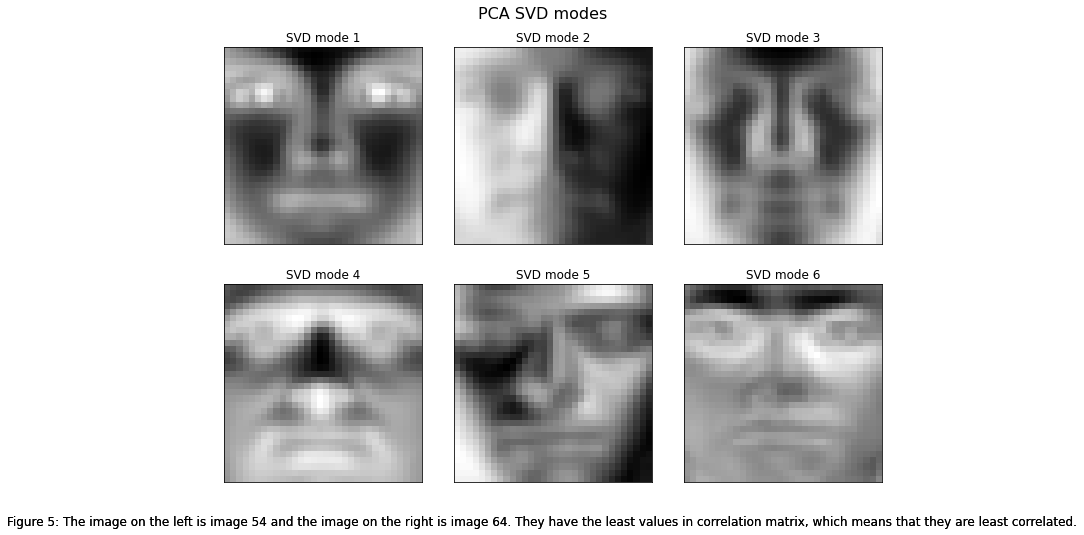

Percentage of variance captured by each mode:
Mode 1: 77.68%
Mode 2: 16.28%
Mode 3: 2.73%
Mode 4: 2.00%
Mode 5: 0.68%
Mode 6: 0.63%


In [413]:
X=results['X']
U, s, Vt = np.linalg.svd(X)
s = s[:6]
print(s)
total_var = np.sum(s**2)

# compute the percentage of variance captured by each mode
var_captured = s**2 / total_var *100

# plot the first 6 SVD modes
fig, axs = plt.subplots(2, 3, figsize=(10, 6), subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle("PCA SVD modes", y=0.95, fontsize=16)

fig.text(0.5, 0.05, 'Figure 5: The image on the left is image 54 and the image on the right is image 64. They have the least values in correlation matrix, which means that they are least correlated.', ha='center', fontsize=12)

fig.subplots_adjust(wspace=0.1, hspace=0.2)
fig.set_size_inches(12, 8)
fig.suptitle("PCA SVD modes",y = 0.95, fontsize=16)
fig.text(0.5, 0.05, 'Figure 5: The image on the left is image 54 and the image on the right is image 64. They have the least values in correlation matrix, which means that they are least correlated.', ha='center', fontsize=12)

for i, ax in enumerate(axs.flat):
    ax.imshow(np.reshape(U[:, i], (32, 32)), cmap='gray')
    ax.set_title('SVD mode {}'.format(i+1))

plt.show()
fig.savefig("figure5.png")


# print the percentage of variance captured by each mode
print('Percentage of variance captured by each mode:')
for i in range(6):
    print('Mode {}: {:.2f}%'.format(i+1, var_captured[i]))
